In [5]:
# Read in scaled X data to verify datatypes

import pandas as pd

X_train = pd.read_csv("../Data/X_train.csv")
X_test = pd.read_csv("../Data/X_test.csv")
y_train = pd.read_csv("../Data/y_train.csv").squeeze()  # Convert from dataframe to series
y_test = pd.read_csv("../Data/y_test.csv").squeeze()    # Convert from dataframe to series
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 21 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     404 non-null    float64
 1   zn       404 non-null    float64
 2   indus    404 non-null    float64
 3   chas     404 non-null    int64  
 4   nox      404 non-null    float64
 5   rm       404 non-null    float64
 6   age      404 non-null    float64
 7   dis      404 non-null    float64
 8   tax      404 non-null    float64
 9   ptratio  404 non-null    float64
 10  b        404 non-null    float64
 11  lstat    404 non-null    float64
 12  1        404 non-null    int64  
 13  2        404 non-null    int64  
 14  3        404 non-null    int64  
 15  4        404 non-null    int64  
 16  5        404 non-null    int64  
 17  6        404 non-null    int64  
 18  7        404 non-null    int64  
 19  8        404 non-null    int64  
 20  24       404 non-null    int64  
dtypes: float64(11), 

In [ ]:
# Polynomial regression
from sklearn.linear_model import ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import cross_val_score
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

CV = KFold(n_splits=5, shuffle=True, random_state=42)

pipeline = make_pipeline(PolynomialFeatures(),
                         ElasticNet(random_state=42))

param_grid = {
    'polynomialfeatures__degree' : [2, 3, 4],
    'elasticnet__alpha' : [.01, .1, 1],     # Actually lambda
    'elasticnet__l1_ratio' : [.4, .6, .8], # Actually alpha
    'elasticnet__max_iter' : [10000]
}

gs = GridSearchCV(pipeline,
                param_grid=param_grid,
                scoring='neg_root_mean_squared_error', 
                cv=CV,
                verbose=0,
                n_jobs=-1)

gs.fit(X_train,y_train)

print("Best Params:",gs.best_params_)
print("Best CV RMSE:", -gs.best_score_)

y_pred = gs.predict(X_test)

rmse = round(root_mean_squared_error(y_test,y_pred),2)
print(f"RMSE: {rmse}, Relative Error: {round(100 * rmse/y_test.mean(),1)}%")           # Value and normalized/relative error

mae = round(mean_absolute_error(y_test,y_pred),2)
print(f"MAE: {mae}, Relative Error: {round(100 * mae/y_test.mean(),1)}%")              # Value and normalized/relative error

print(f"R-sq: {round(100 * r2_score(y_test,y_pred),1)}%")





/home/williamnewton/miniconda3/envs/boston-housing/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.545e+02, tolerance: 2.788e+00
  model = cd_fast.enet_coordinate_descent(
/home/williamnewton/miniconda3/envs/boston-housing/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.159e+02, tolerance: 2.634e+00
  model = cd_fast.enet_coordinate_descent(
/home/williamnewton/miniconda3/envs/boston-housing/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iter

Best Params: {'elasticnet__alpha': 0.1, 'elasticnet__l1_ratio': 0.6, 'elasticnet__max_iter': 20000, 'polynomialfeatures__degree': 3}
Best CV RMSE: 3.5015097972660243
RMSE: 3.45, Relative Error: 16.1%
MAE: 2.17, Relative Error: 10.1%
R-sq: 83.8%


RMSE: 3.45, Relative Error: 16.1%
MAE: 2.17, Relative Error: 10.1%
R-sq: 83.8%



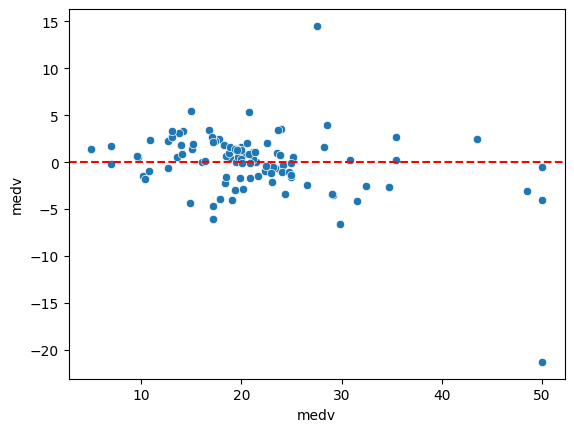

In [ ]:
# Use optimized hyperparameters and extract feature data
pipeline = make_pipeline(PolynomialFeatures(degree=3),
                         ElasticNet(alpha=.1, l1_ratio=.6, max_iter=10000, random_state=42))

pipeline.fit(X_train,y_train)

y_pred = pipeline.predict(X_test)

rmse = round(root_mean_squared_error(y_test,y_pred),2)
print(f"RMSE: {rmse}, Relative Error: {round(100 * rmse/y_test.mean(),1)}%")           # Value and normalized/relative error

mae = round(mean_absolute_error(y_test,y_pred),2)
print(f"MAE: {mae}, Relative Error: {round(100 * mae/y_test.mean(),1)}%")              # Value and normalized/relative error

print(f"R-sq: {round(100 * r2_score(y_test,y_pred),1)}%")
print()

# Residuals Plot
residuals = y_pred - y_test
sns.scatterplot(x=y_test,y=residuals)
plt.axhline(y=0, color='r', linestyle='--');


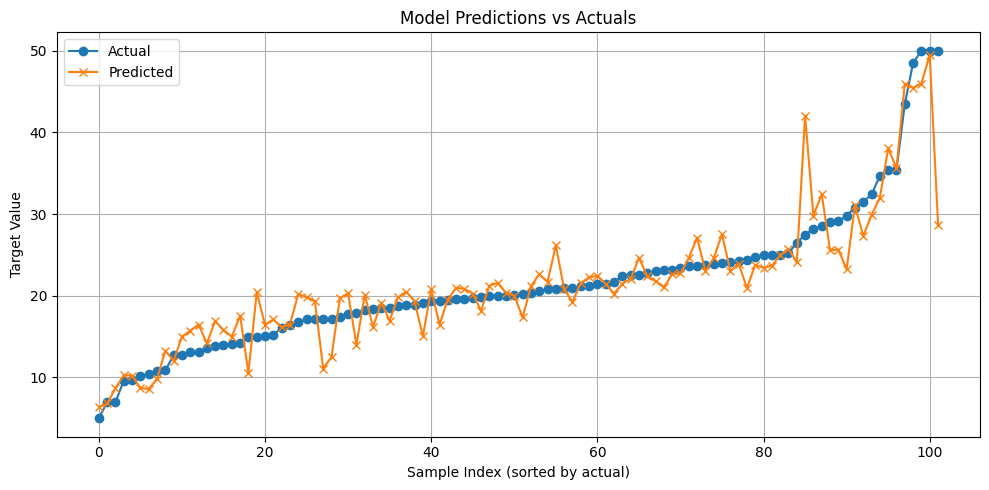

In [ ]:
# Sort actuals and predictions by actual value
sorted_idx = y_test.argsort()
y_true_sorted = y_test.iloc[sorted_idx].reset_index(drop=True)
y_pred_sorted = pd.Series(y_pred, index=y_test.index).iloc[sorted_idx].reset_index(drop=True)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(y_true_sorted, label="Actual", marker='o')
plt.plot(y_pred_sorted, label="Predicted", marker='x')
plt.xlabel("Sample Index (sorted by actual)")
plt.ylabel("Target Value")
plt.title("Polynomial ElasticNet Predictions vs Actuals")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

##### The two outliers are pretty obvious
##### Removing them makes r-sq jump from 83% to 91% but this is also due to such a small test set

In [52]:
# No p-values since model is regularized and coefficients are purposely biased
poly_transformer = pipeline.named_steps['polynomialfeatures']  # Adjust if needed
X_poly_names = poly_transformer.get_feature_names_out(X_train.columns)

coef_df = pd.DataFrame({"Feature": X_poly_names, 'Coefficient': pipeline.named_steps['elasticnet'].coef_})
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

print(coef_df.head(15))  # Top 15 most influential features

               Feature  Coefficient  Abs_Coefficient
6                   rm     1.737355         1.737355
12               lstat    -1.167572         1.167572
1481     dis tax lstat     1.075599         1.075599
1268  rm ptratio lstat     0.959097         0.959097
198            lstat^2     0.957561         0.957561
1572       tax^2 lstat    -0.825002         0.825002
123           rm lstat    -0.759805         0.759805
101             nox rm    -0.730451         0.730451
10             ptratio    -0.730225         0.730225
1605       tax lstat^2     0.704808         0.704808
1478         dis tax^2    -0.697745         0.697745
964         chas tax^2     0.686841         0.686841
152          dis lstat     0.685828         0.685828
1078      nox rm lstat     0.669543         0.669543
1514       dis lstat^2    -0.668392         0.668392


In [ ]:
import shap

# Get transformed data
X_test_poly = poly_transformer.transform(X_test)
X_test_poly_df = pd.DataFrame(X_test_poly, columns=X_poly_names)

# Fit explainer on transformed data
explainer = shap.Explainer(pipeline.named_steps['elasticnet'],
                           X_test_poly_df,
                           algorithm="linear")
shap_values = explainer(X_test_poly_df)

mean_shap = np.abs(shap_values.values).mean(axis=0)
shap_df = pd.DataFrame({'Feature': X_poly_names,'SHAP':mean_shap})
shap_df.sort_values("SHAP",ascending=False).head(25)

,Feature,SHAP
6,rm,1.164996
1605,tax lstat^2,1.083918
1572,tax^2 lstat,1.039797
198,lstat^2,0.989110
12,lstat,0.955032
1481,dis tax lstat,0.841999
1514,dis lstat^2,0.720629
1268,rm ptratio lstat,0.688967
123,rm lstat,0.676128
1478,dis tax^2,0.644723


/tmp/ipykernel_72312/1497001202.py:1: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test_poly_df)


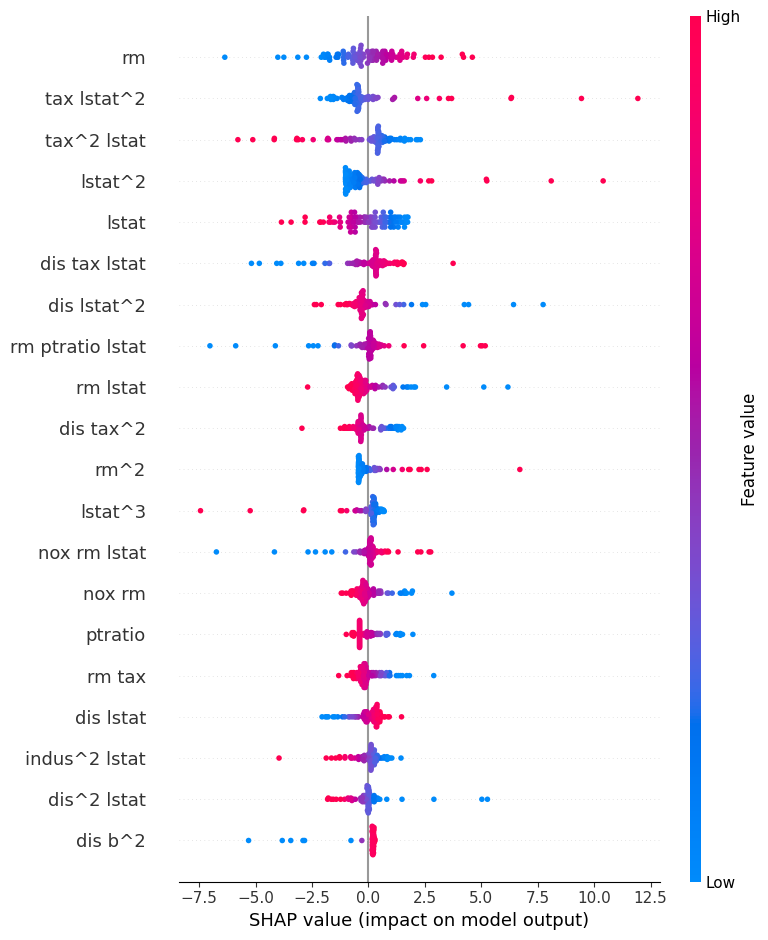

In [58]:
shap.summary_plot(shap_values, X_test_poly_df)

Best Params: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 3, 'n_estimators': 28}
Best CV RMSE: 3.5830418315581447
RMSE: 1.65, Relative Error: 7.7%
MAE: 2.01, Relative Error: 9.4%
R-sq: 89.9%



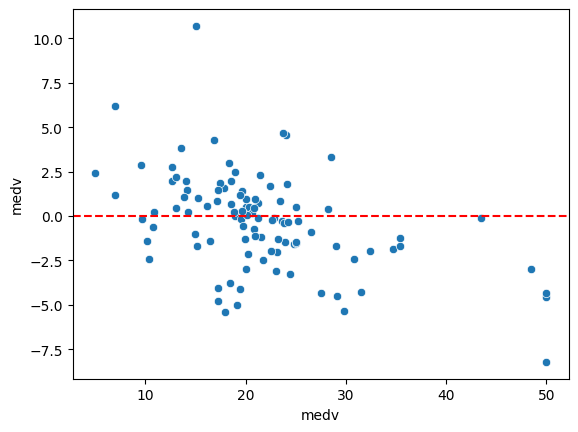

In [67]:
# Random Forest
from sklearn.ensemble import RandomForestRegressor

param_grid = {
    'n_estimators' : [26, 27, 28],
    'max_depth' : [18, 19, 20, 21, 22],     
    'min_samples_split' : [2, 3, 4], 
    'min_samples_leaf' : [1, 2, 5]
}

rf = GridSearchCV(RandomForestRegressor(random_state=42),
                param_grid=param_grid,
                scoring='neg_root_mean_squared_error', 
                cv=CV,
                verbose=0,
                n_jobs=-1)

rf.fit(X_train,y_train)

print("Best Params:",rf.best_params_)
print("Best CV RMSE:", -rf.best_score_)

y_pred = rf.predict(X_test)

rmse = round(np.sqrt(root_mean_squared_error(y_test,y_pred)),2)
print(f"RMSE: {rmse}, Relative Error: {round(100 * rmse/y_test.mean(),1)}%")           # Value and normalized/relative error

mae = round(mean_absolute_error(y_test,y_pred),2)
print(f"MAE: {mae}, Relative Error: {round(100 * mae/y_test.mean(),1)}%")              # Value and normalized/relative error

print(f"R-sq: {round(100 * r2_score(y_test,y_pred),1)}%")
print()

# Residuals Plot
residuals = y_pred - y_test
sns.scatterplot(x=y_test,y=residuals)
plt.axhline(y=0, color='r', linestyle='--');

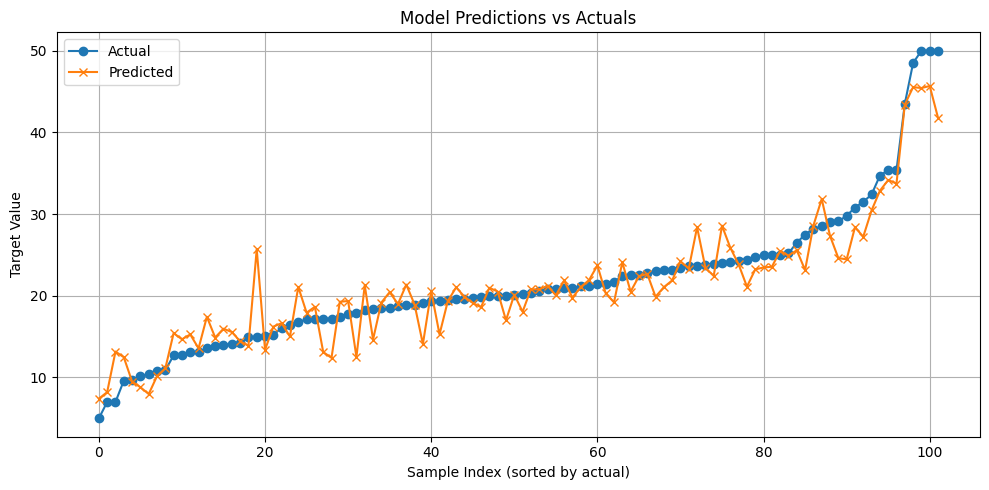

In [ ]:
# Sort actuals and predictions by actual value
sorted_idx = y_test.argsort()
y_true_sorted = y_test.iloc[sorted_idx].reset_index(drop=True)
y_pred_sorted = pd.Series(y_pred, index=y_test.index).iloc[sorted_idx].reset_index(drop=True)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(y_true_sorted, label="Actual", marker='o')
plt.plot(y_pred_sorted, label="Predicted", marker='x')
plt.xlabel("Sample Index (sorted by actual)")
plt.ylabel("Target Value")
plt.title("Random Forest Predictions vs Actuals")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [74]:
# Get best estimator from grid search
importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.best_estimator_.feature_importances_
}).sort_values(by='Importance', ascending=False).reset_index(drop=True)

print(importances_df.head(15))

    Feature  Importance
0        rm    0.492261
1     lstat    0.314763
2       dis    0.065718
3      crim    0.041081
4   ptratio    0.018432
5       nox    0.016164
6       tax    0.014775
7       age    0.013075
8         b    0.011472
9     indus    0.005906
10       24    0.001733
11       zn    0.000999
12        1    0.000844
13        2    0.000500
14        6    0.000402


In [78]:
# SHAP

# Get the best model
best_rf = rf.best_estimator_

# Create the SHAP explainer for tree-based models
explainer = shap.TreeExplainer(best_rf)

# Calculate SHAP values for the training or test data
shap_values = explainer.shap_values(X_test)

mean_shap = np.abs(shap_values).mean(axis=0)
shap_df = pd.DataFrame({'Feature': X_train.columns,'SHAP':mean_shap})
shap_df.sort_values("SHAP",ascending=False).head(15)



,Feature,SHAP
11,lstat,3.344732
5,rm,3.071238
0,crim,0.535560
7,dis,0.390376
9,ptratio,0.373101
4,nox,0.308970
6,age,0.273960
10,b,0.143870
8,tax,0.139220
2,indus,0.095924


/tmp/ipykernel_72312/3746271465.py:2: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test)


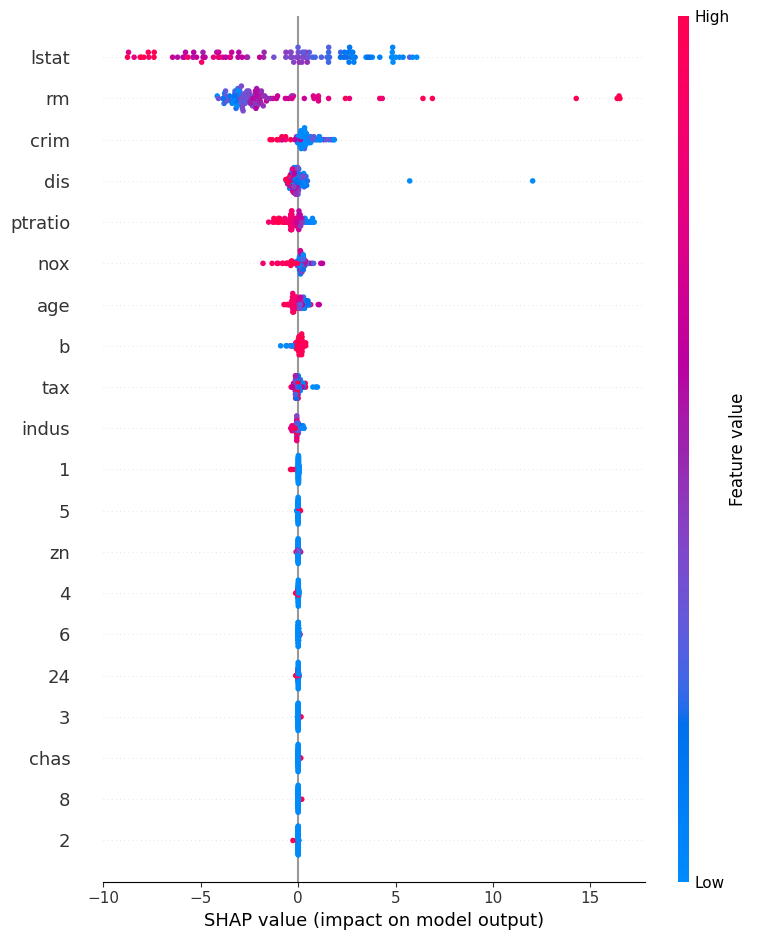

In [79]:
# Plot summary of feature importance
shap.summary_plot(shap_values, X_test)

Best Params: {'learning_rate': 0.05, 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 10, 'n_estimators': 200}
Best CV RMSE: 3.3823535665802416
RMSE: 1.54, Relative Error: 7.2%
MAE: 1.82, Relative Error: 8.5%
R-sq: 92.3%



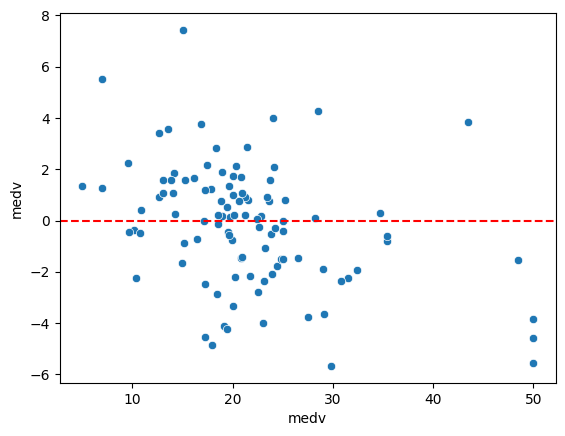

In [80]:
from sklearn.ensemble import GradientBoostingRegressor

# Tuning GBR
param_grid = {
    'n_estimators' : [100, 200, 300, 400, 500],
    'learning_rate' : [.01, .05, .1],
    'max_depth' : [2, 5, 7, 10],     
    'min_samples_split' : [2, 4, 6, 8, 10], 
    'min_samples_leaf' : [1, 3, 5, 10]
}

gb = GridSearchCV(GradientBoostingRegressor(random_state=42),
                param_grid=param_grid,
                scoring='neg_root_mean_squared_error',
                cv=CV,
                verbose=0,
                n_jobs=-1)

gb.fit(X_train,y_train)

print("Best Params:",gb.best_params_)
print("Best CV RMSE:", -gb.best_score_)

y_pred = gb.predict(X_test)

rmse = round(np.sqrt(root_mean_squared_error(y_test,y_pred)),2)
print(f"RMSE: {rmse}, Relative Error: {round(100 * rmse/y_test.mean(),1)}%")           # Value and normalized/relative error

mae = round(mean_absolute_error(y_test,y_pred),2)
print(f"MAE: {mae}, Relative Error: {round(100 * mae/y_test.mean(),1)}%")              # Value and normalized/relative error

print(f"R-sq: {round(100 * r2_score(y_test,y_pred),1)}%")
print()

# Residuals Plot
residuals = y_pred - y_test
sns.scatterplot(x=y_test,y=residuals)
plt.axhline(y=0, color='r', linestyle='--');

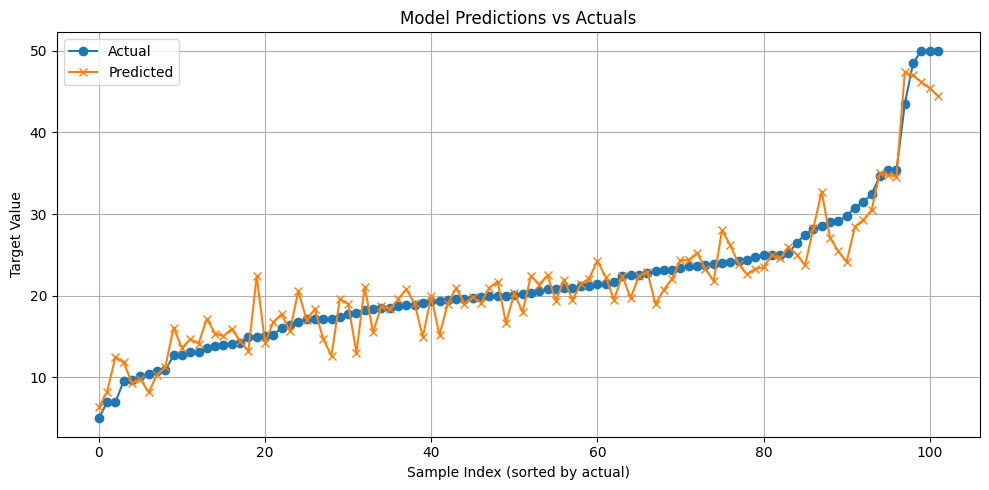

In [ ]:
# Sort actuals and predictions by actual value
sorted_idx = y_test.argsort()
y_true_sorted = y_test.iloc[sorted_idx].reset_index(drop=True)
y_pred_sorted = pd.Series(y_pred, index=y_test.index).iloc[sorted_idx].reset_index(drop=True)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(y_true_sorted, label="Actual", marker='o')
plt.plot(y_pred_sorted, label="Predicted", marker='x')
plt.xlabel("Sample Index (sorted by actual)")
plt.ylabel("Target Value")
plt.title("Gradient Boost Predictions vs Actuals")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [82]:
# Get best estimator from grid search
importances_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': gb.best_estimator_.feature_importances_
}).sort_values(by='Importance', ascending=False).reset_index(drop=True)

print(importances_df.head(15))

    Feature  Importance
0        rm    0.477353
1     lstat    0.323114
2       dis    0.077155
3      crim    0.035674
4   ptratio    0.024144
5       age    0.015261
6       tax    0.015115
7       nox    0.013034
8         b    0.012159
9     indus    0.004084
10        1    0.000833
11     chas    0.000416
12        6    0.000366
13        2    0.000344
14       24    0.000277


In [83]:
# SHAP

# Get the best model
best_rf = gb.best_estimator_

# Create the SHAP explainer for tree-based models
explainer = shap.TreeExplainer(best_rf)

# Calculate SHAP values for the training or test data
shap_values = explainer.shap_values(X_test)

mean_shap = np.abs(shap_values).mean(axis=0)
shap_df = pd.DataFrame({'Feature': X_train.columns,'SHAP':mean_shap})
shap_df.sort_values("SHAP",ascending=False).head(15)


,Feature,SHAP
11,lstat,3.492891
5,rm,2.618883
7,dis,0.631441
6,age,0.617473
0,crim,0.615355
9,ptratio,0.591376
4,nox,0.368382
10,b,0.276344
8,tax,0.239375
2,indus,0.079796


/tmp/ipykernel_72312/3746271465.py:2: FutureWarning: The NumPy global RNG was seeded by calling `np.random.seed`. In a future version this function will no longer use the global RNG. Pass `rng` explicitly to opt-in to the new behaviour and silence this warning.
  shap.summary_plot(shap_values, X_test)


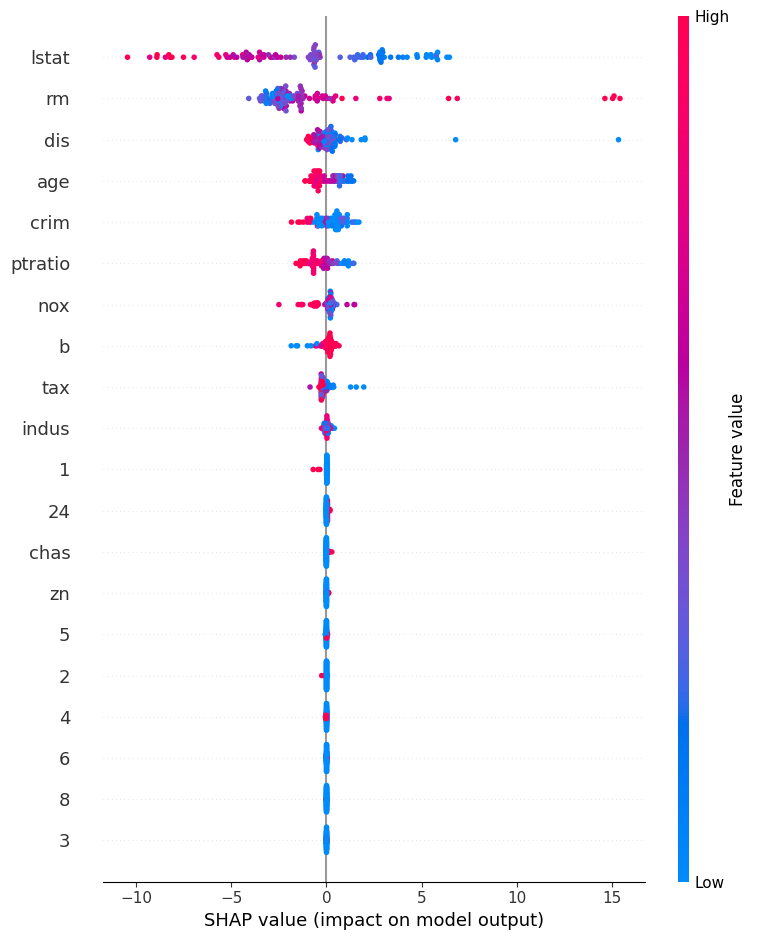

In [84]:
# Plot summary of feature importance
shap.summary_plot(shap_values, X_test)

RMSE: 2.34, Relative Error: 11.1%
MAE: 1.85, Relative Error: 8.7%
R-sq: 91.7%



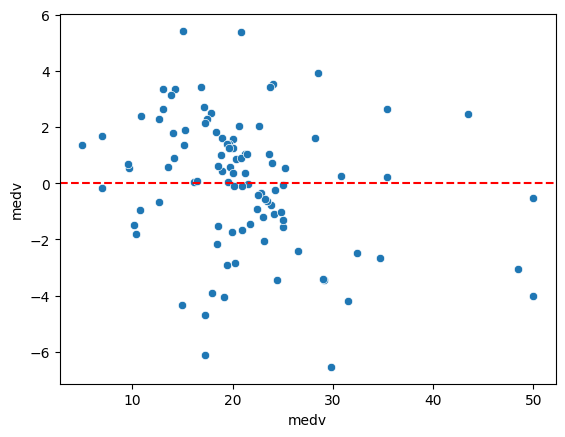

In [30]:
# Assess the two major outliers
outlier_indices = abs(residuals) > 10   # The two in question are the only to exceed this

# Since it's only two datapoints, I will drop them from test and re-run model
X_test_mod = X_test[~outlier_indices]
y_test_mod = y_test[~outlier_indices]

# Re-run testing
y_pred = pipeline.predict(X_test_mod)

rmse = round(root_mean_squared_error(y_test_mod,y_pred),2)
print(f"RMSE: {rmse}, Relative Error: {round(100 * rmse/y_test_mod.mean(),1)}%")           # Value and normalized/relative error

mae = round(mean_absolute_error(y_test_mod,y_pred),2)
print(f"MAE: {mae}, Relative Error: {round(100 * mae/y_test_mod.mean(),1)}%")              # Value and normalized/relative error

print(f"R-sq: {round(100 * r2_score(y_test_mod,y_pred),1)}%")
print()

# Residuals Plot
residuals = y_pred - y_test_mod
sns.scatterplot(x=y_test_mod,y=residuals)
plt.axhline(y=0, color='r', linestyle='--');


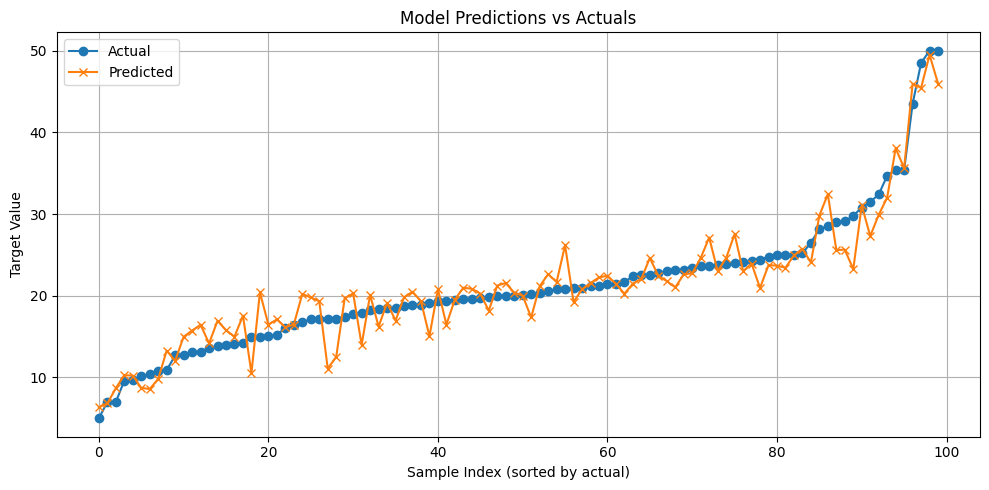

In [33]:
# Sort actuals and predictions by actual value
sorted_idx = y_test_mod.argsort()
y_true_sorted = y_test_mod.iloc[sorted_idx].reset_index(drop=True)
y_pred_sorted = pd.Series(y_pred, index=y_test_mod.index).iloc[sorted_idx].reset_index(drop=True)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(y_true_sorted, label="Actual", marker='o')
plt.plot(y_pred_sorted, label="Predicted", marker='x')
plt.xlabel("Sample Index (sorted by actual)")
plt.ylabel("Target Value")
plt.title("Model Predictions vs Actuals")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Feature significance and SHAP
# No p-values since model is regularized and coefficients are purposely biased
poly_transformer = pipeline.named_steps['polynomialfeatures']  # Adjust if needed
X_poly_names = poly_transformer.get_feature_names_out(X_train.columns)

coef_df = pd.DataFrame({"Feature": X_poly_names, 'Coefficient': pipeline.named_steps['elasticnet'].coef_})
coef_df['Abs_Coefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='Abs_Coefficient', ascending=False)

print(coef_df.head(15))  # Top 15 most influential features

               Feature  Coefficient  Abs_Coefficient
6                   rm     1.737355         1.737355
12               lstat    -1.167572         1.167572
1481     dis tax lstat     1.075599         1.075599
1268  rm ptratio lstat     0.959097         0.959097
198            lstat^2     0.957561         0.957561
1572       tax^2 lstat    -0.825002         0.825002
123           rm lstat    -0.759805         0.759805
101             nox rm    -0.730451         0.730451
10             ptratio    -0.730225         0.730225
1605       tax lstat^2     0.704808         0.704808
1478         dis tax^2    -0.697745         0.697745
964         chas tax^2     0.686841         0.686841
152          dis lstat     0.685828         0.685828
1078      nox rm lstat     0.669543         0.669543
1514       dis lstat^2    -0.668392         0.668392
